In [2]:
import numpy as np
from scipy.integrate import odeint

# Parameters
alpha = 0.01
Lx, Ly = 1.0, 1.0
Nx, Ny = 10, 10
hx, hy = Lx / (Nx - 1), Ly / (Ny - 1)

# Initial condition
U0 = np.zeros((Nx, Ny))

#Initial conditions with all values on first row set to 0.8:
U0[0, :] = 0.8

# Flatten the 2D grid to a 1D vector
U0_flat = U0.flatten()

def heat_eq(U, t, alpha, Nx, Ny, hx, hy):
    U = U.reshape((Nx, Ny))
    dUdt = np.zeros((Nx, Ny))
    
    for i in range(1, Nx-1):
        for j in range(1, Ny-1):
            dUdt[i, j] = alpha * (
                (U[i+1, j] - 2*U[i, j] + U[i-1, j]) / hx**2 +
                (U[i, j+1] - 2*U[i, j] + U[i, j-1]) / hy**2
            )
    
    return dUdt.flatten()

# Time points
t = np.linspace(0, 1, 100)

# Solve the ODE system
U_solution = odeint(heat_eq, U0_flat, t, args=(alpha, Nx, Ny, hx, hy))

# Reshape the solution back to 2D
U_solution = U_solution.reshape((len(t), Nx, Ny))


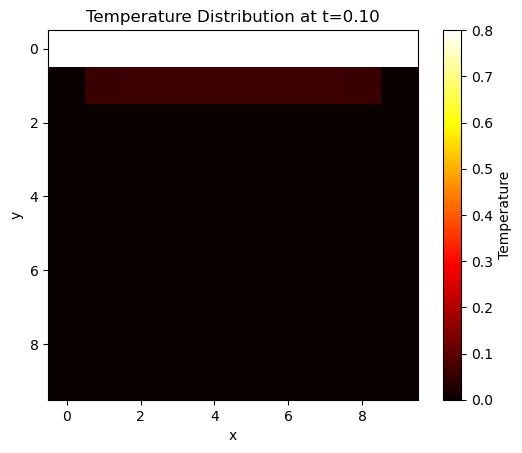

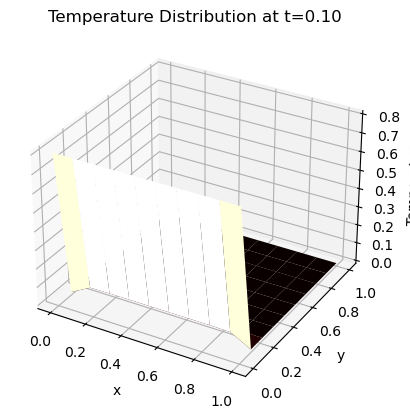

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Time point to visualize
time_index = 10 # Example: visualize the solution at the 10th time point

# Extract the 2D array for the chosen time point
U_at_time = U_solution[time_index, :, :]

# Create a heatmap
plt.imshow(U_at_time, cmap='hot', interpolation='nearest')
plt.colorbar(label='Temperature')
plt.title(f'Temperature Distribution at t={t[time_index]:.2f}')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Create a 3D surface plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(np.linspace(0, Lx, Nx), np.linspace(0, Ly, Ny))
ax.plot_surface(X, Y, U_at_time, cmap='hot')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Temperature')
plt.title(f'Temperature Distribution at t={t[time_index]:.2f}')
plt.show()